In [3]:
# ! pip install wordcloud

In [60]:
%matplotlib inline 

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
import requests
from bs4 import BeautifulSoup


url = 'http://www.nytimes.com/2009/12/21/us/21storm.html'
# url = 'https://www.kla-tencor.com'
# url = 'https://www.blog.pythonlibrary.org/2017/10/24/enhancing-photos-with-python'
# url = 'https://web.archive.org/web/20121007172955/https://www.nga.gov/collection/anZ1.htm'
# url = 'http://www.gutenberg.org/files/44999/44999-8.txt'
# url = 'http://www.gutenberg.org/files/15/text/moby-009.txt'  # medium size file
url = 'http://www.gutenberg.org/files/44000/44000-8.txt'  # large file 

# load text data into var 'text'
page = requests.get(url)
data = BeautifulSoup(page.text, 'html.parser')
data = BeautifulSoup.get_text(data)
text = data 

# print (text)
# data = open("sfgate.html",'r').read()
# text = nltk.clean_html(data)

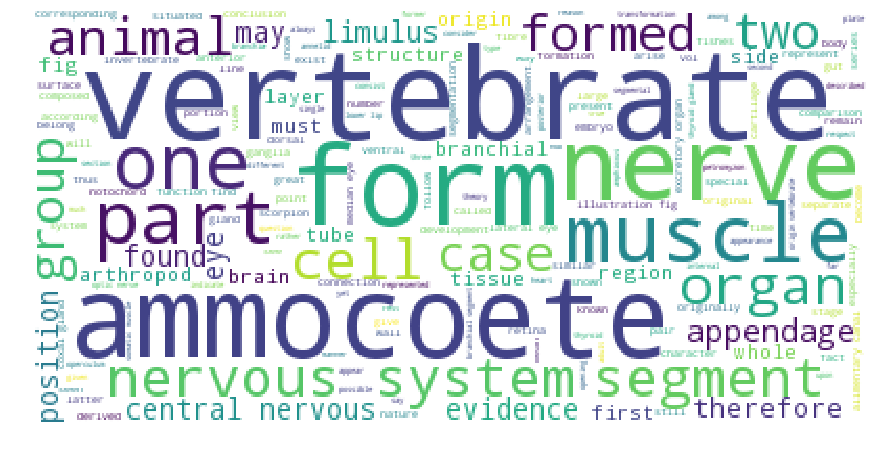

In [61]:
# actual code for wordcloud 
cleaned = nltk.word_tokenize(text.lower())
wordlist = [x for x in cleaned if (len(x)>=2 and x.isalpha())]
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(" ".join(wordlist))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## below you will see 'function' 'return' and 'var' highlighted since the incoming text contains javascript from the html source 
## we need to clean that

## A better implemenation

In [53]:
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request


def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)


url = 'http://www.nytimes.com/2009/12/21/us/21storm.html'
# url = 'https://www.kla-tencor.com'
# url = 'https://www.blog.pythonlibrary.org/2017/10/24/enhancing-photos-with-python'

html = urllib.request.urlopen(url).read()
text = text_from_html(html)
# print(text)

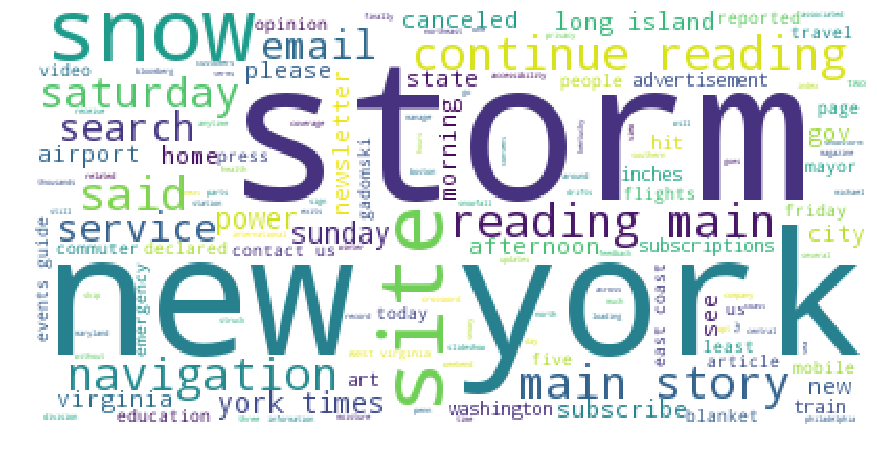

In [54]:
# actual code for wordcloud 
cleaned = nltk.word_tokenize(text.lower())
wordlist = [x for x in cleaned if (len(x)>=2 and x.isalpha())]
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(" ".join(wordlist))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()